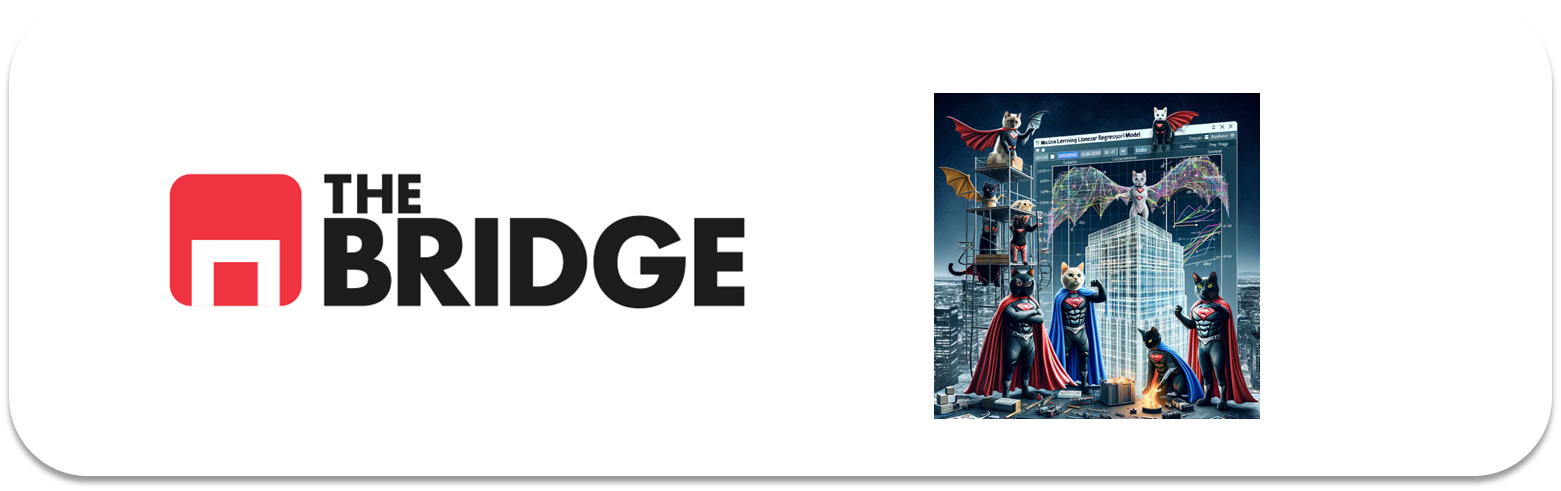

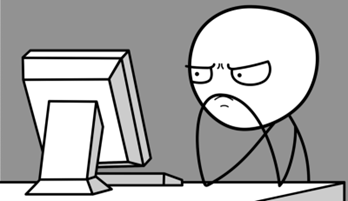

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logística para clasificación binaria**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  

### Inicio: Entendiendo el problema

En este caso el objetivo de los ejercicios es hacer un modelado de regresión logística sobre el dataset conocidos como "Adults" o "Census Income" que permita casificar a las personas en si ganan más de 50K dolalres o no, en función de una serie de características demográficas y de empleo. Sigue las instrucciones cuando sea necesario para poder continuar

El nombre de las columnas y sus valores se muestra a continuación (las columnas siguen el mismo orden que en el fichero, por si tuvieras que utilizar estos nombres)

age: edad, continuous.  

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  

fnlwgt: continuous (a eliminar)  

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  

education-num: continuous.  

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  

sex: Female, Male.  

capital-gain: continuous.  

capital-loss: continuous.  

hours-per-week: continuous.  

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Mejora características de impresión
from pprint import pprint

# Tratamiento de variables categóricas
from sklearn.preprocessing import OrdinalEncoder

# Tratamiento variables numéricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Separación df
from sklearn.model_selection import train_test_split

# Evaluación regresión logística
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


# Entrenamiento modelos
from sklearn.linear_model import LogisticRegression

### Ejercicio 1: Carga de datos y vistazo


Carga el conjunto de datos de TRAIN ("./data/adult.data") en un dataframe (tendrás que explorar el tipo de archivo y darle nombre a las columnas). Muestra la descripción de los datos y las primeras filas del conjunto de datos.

*Cargamos los datos, que es un poco tricky*

In [2]:
columnas_df = ["age","workclass","fnlwgt","education","education-num", "marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country", "salario"]

In [3]:
train_set = pd.read_csv("./data/adult.data", names=columnas_df, index_col=False )
train_set.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salario
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salario         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Ejercicio 2: Preparación y limpieza de Datos (I)

En una situación normal tendríamos que revisar el dataset para ver qué podemos limpiar (convertir tipos, cambiar valores raros, etc) y sólo no deberíamos imputar faltantes sobre el dataset global. Aquí te dirigiré los pasos:

1. Quita los espacios iniciales y finales de todos los valores string del dataset.
2. Comprueba que 'workclass', 'occupation', 'native_country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").

In [5]:
# 1. Quita los espacios iniciales y finales de todos los valores string del dataset.
columnas_object = train_set.select_dtypes(['object'])
temp = columnas_object.columns.tolist()
for col in temp:
    train_set[col]= train_set[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salario         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# 2. Comprueba que 'workclass', 'occupation', 'native_country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
lista_col_raras = ['workclass', 'occupation', 'native-country']
for col in lista_col_raras:
    valores = train_set[col].unique()
    print(f'Para {col}: {valores}')
    print()

Para workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Para occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Para native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']



In [8]:
valores_raros = ['?', 'Unknown', 'Other', 'NA', 'N/A', 'Not available', 'Missing']
for col in lista_col_raras:
    # Obtener todos los valores únicos, incluyendo los faltantes
    valores_unicos = set(train_set[col])
    
    # Identificar los valores raros que indican faltantes
    valores_faltantes = [val for val in valores_unicos if val in valores_raros]
    
    print(f'Para {col}, los valores raros que indican faltantes son: {valores_faltantes}')
    print()

Para workclass, los valores raros que indican faltantes son: ['?']

Para occupation, los valores raros que indican faltantes son: ['?']

Para native-country, los valores raros que indican faltantes son: ['?']



In [9]:
for col in lista_col_raras:
    train_set[col]=train_set[col].apply(lambda x: np.nan if x =="?" else x)

In [10]:
train_set.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salario              0
dtype: int64

In [11]:
train_set = train_set.dropna()

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salario         30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
# 3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").
train_set.drop(columns=["fnlwgt"],inplace=True)

In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  salario         30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Ejercicio 3: Preparación y limpieza de Datos (II)

Muestra el reparto de valores de "native-country". Convierte la variable en una binara con 1 para ciudadanos norteamericanos y 0 para el resto.

NOTA: En otras ocasiones lo hubieramos tratados por continentes por ejemplo, pero de primeras la diferencia de distribución es tan alta que es mejor simplificar que no quedarse con todos los valores

In [15]:
train_set['native-country'].value_counts()

native-country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

In [16]:
train_set['native-country-bin'] = train_set['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

In [17]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 30162 non-null  int64 
 1   workclass           30162 non-null  object
 2   education           30162 non-null  object
 3   education-num       30162 non-null  int64 
 4   marital-status      30162 non-null  object
 5   occupation          30162 non-null  object
 6   relationship        30162 non-null  object
 7   race                30162 non-null  object
 8   sex                 30162 non-null  object
 9   capital-gain        30162 non-null  int64 
 10  capital-loss        30162 non-null  int64 
 11  hours-per-week      30162 non-null  int64 
 12  native-country      30162 non-null  object
 13  salario             30162 non-null  object
 14  native-country-bin  30162 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
train_set['native-country-bin'].value_counts()

native-country-bin
1    27504
0     2658
Name: count, dtype: int64

### Ejercicio 4: Preparación y limpieza de Datos (III)

Escoge la variable target, ¿qué particularidad tiene?¿qué debemos hacer con ella? Hazlo.

In [19]:
train_set['salario'].unique()

array(['<=50K', '>50K'], dtype=object)

In [20]:
train_set['salario'].value_counts()

salario
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [21]:
train_set['target'] = train_set['salario'].apply(lambda x: 1 if x == '>50K' else 0)

In [22]:
train_set.target.value_counts()

target
0    22654
1     7508
Name: count, dtype: int64

### EJERCICIO EXTRA. Preparación numéricas 

### Ejercicio 5: Preparar variables categóricas (I)

Prepara las variables categóricas, salvo "education" y "native_country" (o su equivalente si no la has llamado así al connvertirla en binaria), convirtiéndolas con un one-hot encoding (usa el pd.get_dummies). NOTA: Recuerda que este es el dataset de train, por eso lo atacamos directamente.

In [23]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 30162 non-null  int64 
 1   workclass           30162 non-null  object
 2   education           30162 non-null  object
 3   education-num       30162 non-null  int64 
 4   marital-status      30162 non-null  object
 5   occupation          30162 non-null  object
 6   relationship        30162 non-null  object
 7   race                30162 non-null  object
 8   sex                 30162 non-null  object
 9   capital-gain        30162 non-null  int64 
 10  capital-loss        30162 non-null  int64 
 11  hours-per-week      30162 non-null  int64 
 12  native-country      30162 non-null  object
 13  salario             30162 non-null  object
 14  native-country-bin  30162 non-null  int64 
 15  target              30162 non-null  int64 
dtypes: int64(7), object(9)
memo

In [24]:
temp = columnas_object.columns.tolist()
temp

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salario']

In [25]:
lista_cat_one_hot = ['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'salario']

In [26]:
train_set = pd.get_dummies(train_set, columns=lista_cat_one_hot, dtype = int)

In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   30162 non-null  int64 
 1   education                             30162 non-null  object
 2   education-num                         30162 non-null  int64 
 3   capital-gain                          30162 non-null  int64 
 4   capital-loss                          30162 non-null  int64 
 5   hours-per-week                        30162 non-null  int64 
 6   native-country                        30162 non-null  object
 7   native-country-bin                    30162 non-null  int64 
 8   target                                30162 non-null  int64 
 9   workclass_Federal-gov                 30162 non-null  int32 
 10  workclass_Local-gov                   30162 non-null  int32 
 11  workclass_Private                

### Ejercicio 6: Preparar variables categóricas (II)

Codifica la variable "education" usando un ordinal encoding, no uses la codificación por defecto, elígela tú y razónala o bien demuestra pillería y que has revisado el dataset.

In [28]:
train_set.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [29]:
train_set['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [30]:
from sklearn.preprocessing import OrdinalEncoder
educational_levels = [
    'Preschool',
    '1st-4th',
    '5th-6th',
    '7th-8th',
    '9th',
    '10th',
    '11th',
    '12th',
    'HS-grad',
    'Some-college',
    'Assoc-voc',
    'Assoc-acdm',
    'Bachelors',
    'Masters',
    'Prof-school',
    'Doctorate'
]
ordinal_encoder = OrdinalEncoder(categories=[educational_levels])
train_set['education_ordinal'] = ordinal_encoder.fit_transform(train_set[['education']])

In [31]:
train_set[['education_ordinal','education','education-num']].sample(10)

,education_ordinal,education,education-num
3564,9.0,Some-college,10
6725,8.0,HS-grad,9
7191,8.0,HS-grad,9
14311,8.0,HS-grad,9
183,3.0,7th-8th,4
15832,15.0,Doctorate,16
24929,9.0,Some-college,10
2076,8.0,HS-grad,9
16664,9.0,Some-college,10
17780,10.0,Assoc-voc,11


In [32]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   30162 non-null  int64  
 1   education                             30162 non-null  object 
 2   education-num                         30162 non-null  int64  
 3   capital-gain                          30162 non-null  int64  
 4   capital-loss                          30162 non-null  int64  
 5   hours-per-week                        30162 non-null  int64  
 6   native-country                        30162 non-null  object 
 7   native-country-bin                    30162 non-null  int64  
 8   target                                30162 non-null  int64  
 9   workclass_Federal-gov                 30162 non-null  int32  
 10  workclass_Local-gov                   30162 non-null  int32  
 11  workclass_Private   

NOTA: En un ejercicio completo deberíamos decidir si escalar las variables numéricas contínuas, si quieres puedes hacero tú como extra y comparar con el modelo que vamos a completar en este conjunto de ejercicios.

In [33]:
train_set.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,native-country-bin,target,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salario_<=50K,salario_>50K,education_ordinal
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.00000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.911876,0.248922,0.031265,0.068530,0.738877,...,0.009482,0.029673,0.093396,0.007659,0.85979,0.324315,0.675685,0.751078,0.248922,9.121312
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.283480,0.432396,0.174035,0.252657,0.439254,...,0.096915,0.169687,0.290991,0.087179,0.34721,0.468126,0.468126,0.432396,0.432396,2.549995
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,8.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,9.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,12.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,15.000000


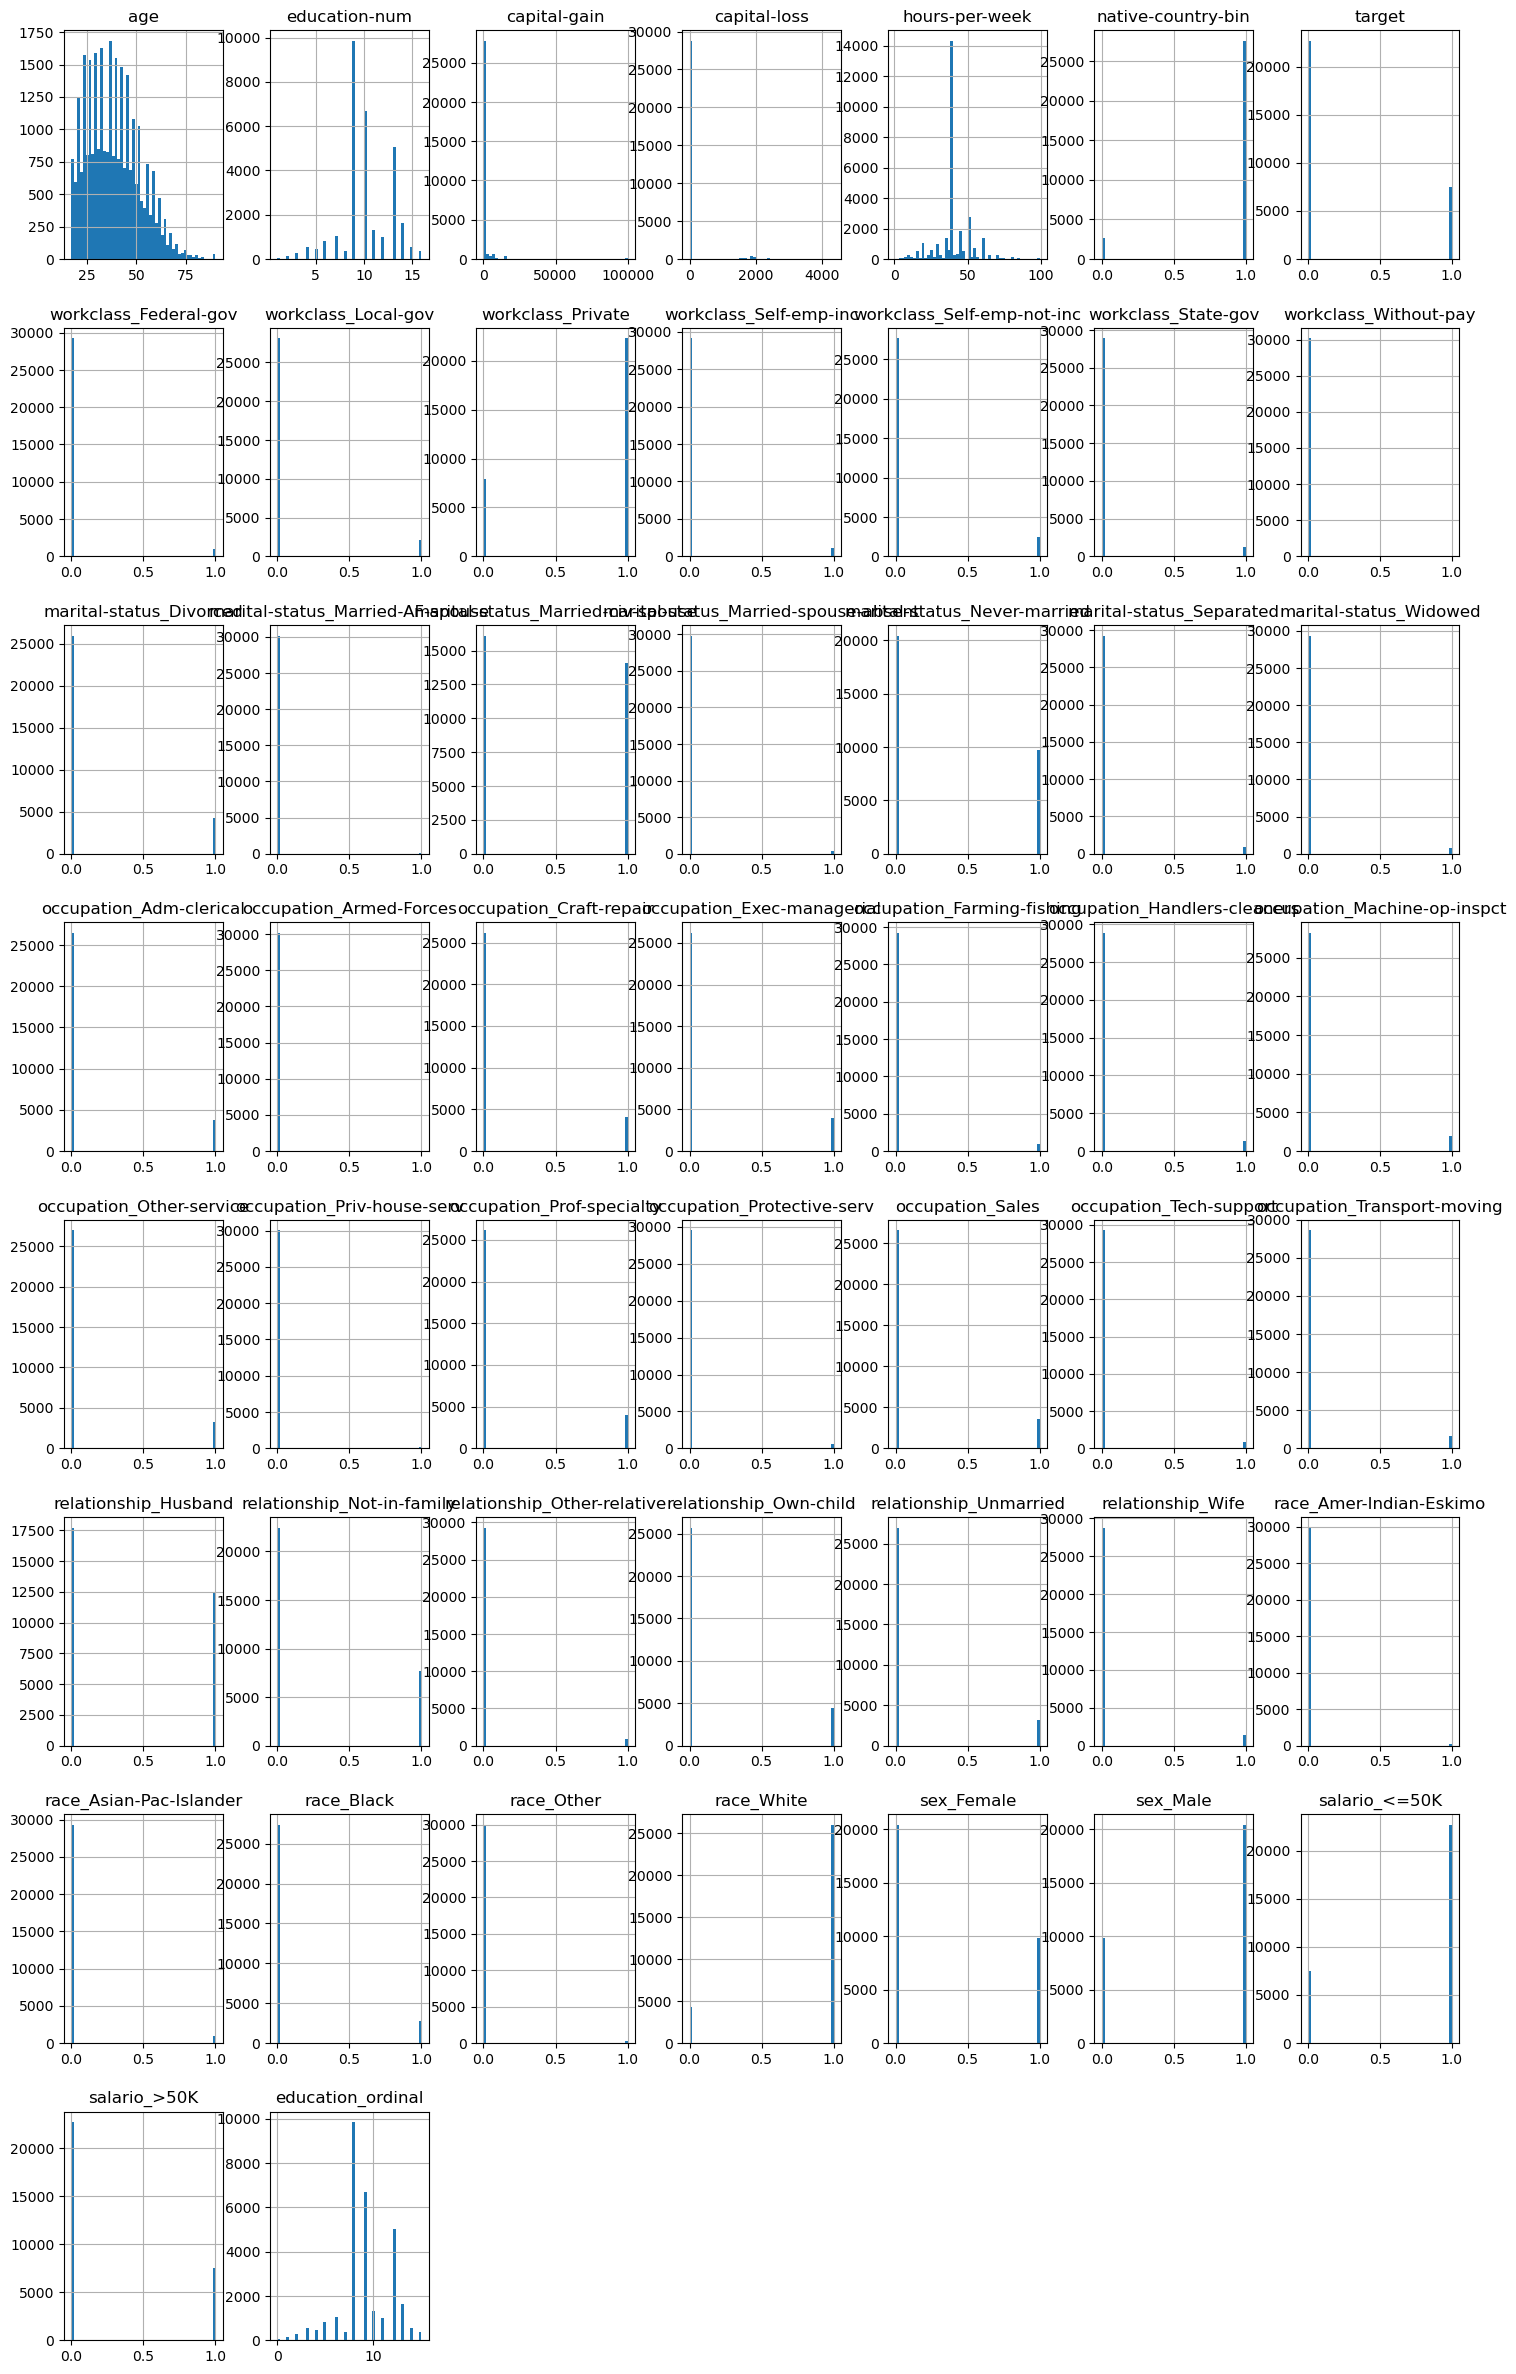

In [34]:
train_set.hist(bins=50, figsize=(18, 30)) 
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'education_ordinal'}>, <Axes: >]],
      dtype=object)

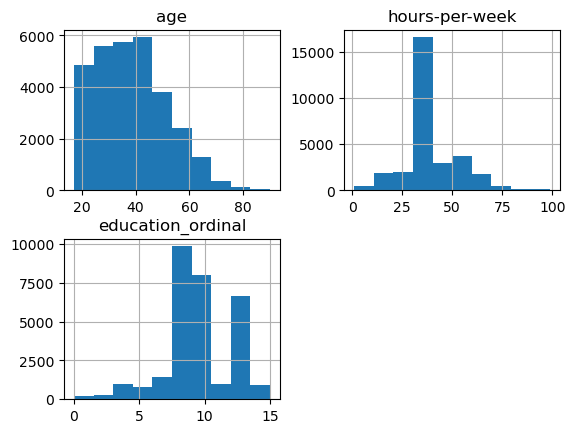

In [35]:
train_set[['age','hours-per-week','education_ordinal']].hist()

In [36]:
features_num = ['age','hours-per-week','education_ordinal']

min_max_scaler = MinMaxScaler(feature_range = (0,1))

resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(train_set[features_num]), columns= features_num)

resultado_min_max.describe()

,age,hours-per-week,education_ordinal
count,30162.000000,30162.000000,30162.000000
mean,0.293670,0.407462,0.608087
std,0.179927,0.122245,0.170000
min,0.000000,0.000000,0.000000
25%,0.150685,0.397959,0.533333
50%,0.273973,0.397959,0.600000
75%,0.410959,0.448980,0.800000
max,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'education_ordinal'}>, <Axes: >]],
      dtype=object)

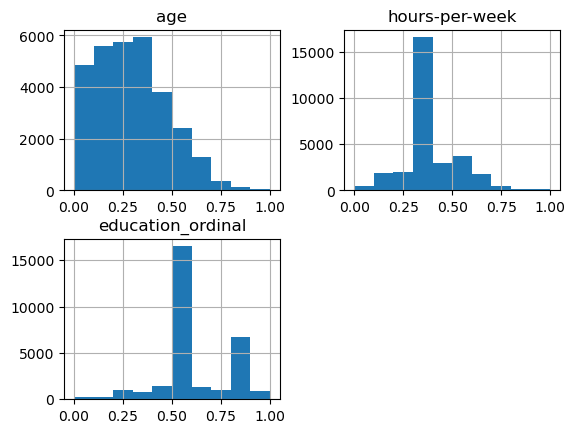

In [37]:
resultado_min_max.hist()

In [38]:
train_set[features_num] = min_max_scaler.fit_transform(train_set[features_num])

In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   30162 non-null  float64
 1   education                             30162 non-null  object 
 2   education-num                         30162 non-null  int64  
 3   capital-gain                          30162 non-null  int64  
 4   capital-loss                          30162 non-null  int64  
 5   hours-per-week                        30162 non-null  float64
 6   native-country                        30162 non-null  object 
 7   native-country-bin                    30162 non-null  int64  
 8   target                                30162 non-null  int64  
 9   workclass_Federal-gov                 30162 non-null  int32  
 10  workclass_Local-gov                   30162 non-null  int32  
 11  workclass_Private   

### Ejercicio 7: Modelo (I)

Instancia el modelo de regresión logística, con el hiperparámetro "max_iter" a 10000.

In [40]:
log_reg = LogisticRegression(max_iter = 10000)

### Ejercicio 8: Entrenamiento

Entrena modelo para el dataset de train tal como lo hemos preparado, creando antes el dataset sólo de features (X_train) y la serie con los valores del target (y_train). NOTA: Deshazte de "education_num" si has codificado tú a mano "education".

In [41]:
lista_features_eliminar = ['education','education-num', 'capital-gain', 'capital-loss','native-country','target','salario_<=50K','salario_>50K']   

In [42]:
X_train = train_set.drop(lista_features_eliminar,axis = 1)
y_train = train_set['target']

In [43]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [44]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[ 2.11297779  2.88435541  0.23369981  0.67027245  0.01649184  0.22979713
   0.47156063 -0.21545851 -0.15786959 -1.01477074 -0.48975158  1.47580342
   1.33984121 -0.51313972 -0.93048302 -0.54588944 -0.33635765  0.13588385
  -0.2844212   0.19279897  0.96472108 -0.81030388 -0.57475548 -0.16379789
  -0.77118389 -1.30799476  0.74678141  0.67700385  0.43867817  0.72848324
   0.02812973 -0.0575185   0.24325626 -0.54677591 -0.94549096  0.04164922
   1.2649031  -0.2748204   0.26434117  0.14735999 -0.37500396  0.23814642
  -0.43024614  0.43026935  4.37474813]]
[-7.64947617]
[0 1]


In [45]:
intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
education_ordinal,4.374748
hours-per-week,2.884355
age,2.112978
marital-status_Married-AF-spouse,1.475803
marital-status_Married-civ-spouse,1.339841


### Ejercicio 9: Evaluación (I)

Previo a la evaluación necesitamos obtener y preparar el dataset de test. Carga el dataset a partir de "./data/adult.test". Luego aplícale las mismas operaciones que has realizado sobre el train. (NOTA; Puede que tengas que cambiar alguna cosa en la variable "income" para convertirla)

In [46]:
test_set = pd.read_csv("./data/adult.test", index_col =False, names=columnas_df )
test_set.head(8)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salario
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.


DESDE AQUI_Test

In [47]:
# 1. Quita los espacios iniciales y finales de todos los valores string del dataset.
columnas_object = test_set.select_dtypes(['object'])
temp = columnas_object.columns.tolist()
for col in temp:
    test_set[col]= test_set[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [48]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salario         16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [49]:
# 2. Comprueba que 'workclass', 'occupation', 'native_country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
lista_col_raras = ['workclass', 'occupation', 'native-country']
for col in lista_col_raras:
    valores = test_set[col].unique()
    print(f'Para {col}: {valores}')
    print()

Para workclass: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Para occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Para native-country: ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France']



In [50]:
valores_raros = ['?', 'Unknown', 'Other', 'NA', 'N/A', 'Not available', 'Missing']
for col in lista_col_raras:
    # Obtener todos los valores únicos, incluyendo los faltantes
    valores_unicos = set(test_set[col])
    
    # Identificar los valores raros que indican faltantes
    valores_faltantes = [val for val in valores_unicos if val in valores_raros]
    
    print(f'Para {col}, los valores raros que indican faltantes son: {valores_faltantes}')
    print()

Para workclass, los valores raros que indican faltantes son: ['?']

Para occupation, los valores raros que indican faltantes son: ['?']

Para native-country, los valores raros que indican faltantes son: ['?']



In [51]:
for col in lista_col_raras:
    test_set[col]=test_set[col].apply(lambda x: np.nan if x =="?" else x)

In [52]:
test_set.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
salario             0
dtype: int64

In [53]:
test_set = test_set.dropna()

In [54]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education       15060 non-null  object
 4   education-num   15060 non-null  int64 
 5   marital-status  15060 non-null  object
 6   occupation      15060 non-null  object
 7   relationship    15060 non-null  object
 8   race            15060 non-null  object
 9   sex             15060 non-null  object
 10  capital-gain    15060 non-null  int64 
 11  capital-loss    15060 non-null  int64 
 12  hours-per-week  15060 non-null  int64 
 13  native-country  15060 non-null  object
 14  salario         15060 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


In [55]:
# 3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").
test_set.drop(columns=["fnlwgt"],inplace=True)

In [56]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   education       15060 non-null  object
 3   education-num   15060 non-null  int64 
 4   marital-status  15060 non-null  object
 5   occupation      15060 non-null  object
 6   relationship    15060 non-null  object
 7   race            15060 non-null  object
 8   sex             15060 non-null  object
 9   capital-gain    15060 non-null  int64 
 10  capital-loss    15060 non-null  int64 
 11  hours-per-week  15060 non-null  int64 
 12  native-country  15060 non-null  object
 13  salario         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


### Ejercicio 3: Preparación y limpieza de Datos (II)_test

Muestra el reparto de valores de "native-country". Convierte la variable en una binara con 1 para ciudadanos norteamericanos y 0 para el resto.

NOTA: En otras ocasiones lo hubieramos tratados por continentes por ejemplo, pero de primeras la diferencia de distribución es tan alta que es mejor simplificar que no quedarse con todos los valores

In [57]:
test_set['native-country'].value_counts()

native-country
United-States                 13788
Mexico                          293
Philippines                      95
Puerto-Rico                      66
Germany                          65
Canada                           56
El-Salvador                      47
India                            47
China                            45
Cuba                             41
England                          33
Italy                            32
South                            30
Dominican-Republic               30
Japan                            30
Portugal                         28
Haiti                            27
Columbia                         26
Poland                           25
Guatemala                        23
Jamaica                          23
Greece                           20
Vietnam                          19
Ecuador                          16
Nicaragua                        15
Peru                             15
Iran                             14
Taiwan       

In [58]:
test_set['native-country-bin'] = test_set['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

In [59]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 15060 non-null  int64 
 1   workclass           15060 non-null  object
 2   education           15060 non-null  object
 3   education-num       15060 non-null  int64 
 4   marital-status      15060 non-null  object
 5   occupation          15060 non-null  object
 6   relationship        15060 non-null  object
 7   race                15060 non-null  object
 8   sex                 15060 non-null  object
 9   capital-gain        15060 non-null  int64 
 10  capital-loss        15060 non-null  int64 
 11  hours-per-week      15060 non-null  int64 
 12  native-country      15060 non-null  object
 13  salario             15060 non-null  object
 14  native-country-bin  15060 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


In [60]:
test_set['native-country-bin'].value_counts()

native-country-bin
1    13788
0     1272
Name: count, dtype: int64

### Ejercicio 4: Preparación y limpieza de Datos (III)_test

Escoge la variable target, ¿qué particularidad tiene?¿qué debemos hacer con ella? Hazlo.

In [61]:
test_set['salario'].unique()

array(['<=50K.', '>50K.'], dtype=object)

In [62]:
test_set['salario'].value_counts()

salario
<=50K.    11360
>50K.      3700
Name: count, dtype: int64

In [63]:
test_set['target'] = test_set['salario'].apply(lambda x: 1 if x == '>50K' else 0)

In [64]:
test_set.target.value_counts()

target
0    15060
Name: count, dtype: int64

### EJERCICIO EXTRA. Preparación numéricas_test

### Ejercicio 5: Preparar variables categóricas (I)_test

Prepara las variables categóricas, salvo "education" y "native_country" (o su equivalente si no la has llamado así al connvertirla en binaria), convirtiéndolas con un one-hot encoding (usa el pd.get_dummies). NOTA: Recuerda que este es el dataset de train, por eso lo atacamos directamente.

In [65]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 15060 non-null  int64 
 1   workclass           15060 non-null  object
 2   education           15060 non-null  object
 3   education-num       15060 non-null  int64 
 4   marital-status      15060 non-null  object
 5   occupation          15060 non-null  object
 6   relationship        15060 non-null  object
 7   race                15060 non-null  object
 8   sex                 15060 non-null  object
 9   capital-gain        15060 non-null  int64 
 10  capital-loss        15060 non-null  int64 
 11  hours-per-week      15060 non-null  int64 
 12  native-country      15060 non-null  object
 13  salario             15060 non-null  object
 14  native-country-bin  15060 non-null  int64 
 15  target              15060 non-null  int64 
dtypes: int64(7), object(9)
memo

In [66]:
temp = columnas_object.columns.tolist()
temp

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salario']

In [67]:
lista_cat_one_hot = ['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'salario']

In [68]:
test_set = pd.get_dummies(test_set, columns=lista_cat_one_hot, dtype = int)

In [69]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   15060 non-null  int64 
 1   education                             15060 non-null  object
 2   education-num                         15060 non-null  int64 
 3   capital-gain                          15060 non-null  int64 
 4   capital-loss                          15060 non-null  int64 
 5   hours-per-week                        15060 non-null  int64 
 6   native-country                        15060 non-null  object
 7   native-country-bin                    15060 non-null  int64 
 8   target                                15060 non-null  int64 
 9   workclass_Federal-gov                 15060 non-null  int32 
 10  workclass_Local-gov                   15060 non-null  int32 
 11  workclass_Private                

### Ejercicio 6: Preparar variables categóricas (II)_test

Codifica la variable "education" usando un ordinal encoding, no uses la codificación por defecto, elígela tú y razónala o bien demuestra pillería y que has revisado el dataset.

In [70]:
test_set.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [71]:
test_set['education-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

In [72]:
from sklearn.preprocessing import OrdinalEncoder
educational_levels = [
    'Preschool',
    '1st-4th',
    '5th-6th',
    '7th-8th',
    '9th',
    '10th',
    '11th',
    '12th',
    'HS-grad',
    'Some-college',
    'Assoc-voc',
    'Assoc-acdm',
    'Bachelors',
    'Masters',
    'Prof-school',
    'Doctorate'
]
ordinal_encoder = OrdinalEncoder(categories=[educational_levels])
test_set['education_ordinal'] = ordinal_encoder.fit_transform(test_set[['education']])

In [73]:
test_set[['education_ordinal','education','education-num']].sample(10)

,education_ordinal,education,education-num
7768,9.0,Some-college,10
2384,11.0,Assoc-acdm,12
8846,12.0,Bachelors,13
13153,13.0,Masters,14
15990,10.0,Assoc-voc,11
4680,12.0,Bachelors,13
15932,9.0,Some-college,10
8042,8.0,HS-grad,9
3692,13.0,Masters,14
8805,9.0,Some-college,10


In [74]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   15060 non-null  int64  
 1   education                             15060 non-null  object 
 2   education-num                         15060 non-null  int64  
 3   capital-gain                          15060 non-null  int64  
 4   capital-loss                          15060 non-null  int64  
 5   hours-per-week                        15060 non-null  int64  
 6   native-country                        15060 non-null  object 
 7   native-country-bin                    15060 non-null  int64  
 8   target                                15060 non-null  int64  
 9   workclass_Federal-gov                 15060 non-null  int32  
 10  workclass_Local-gov                   15060 non-null  int32  
 11  workclass_Private   

NOTA: En un ejercicio completo deberíamos decidir si escalar las variables numéricas contínuas, si quieres puedes hacero tú como extra y comparar con el modelo que vamos a completar en este conjunto de ejercicios.

In [75]:
test_set.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,native-country-bin,target,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salario_<=50K.,salario_>50K.,education_ordinal
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.0,15060.000000,15060.000000,15060.000000,...,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594,0.915538,0.0,0.030744,0.068592,0.731806,...,0.009894,0.027092,0.093692,0.008101,0.861222,0.326228,0.673772,0.754316,0.245684,9.112749
std,13.380676,2.558727,7703.181842,406.283245,12.062831,0.278089,0.0,0.172628,0.252768,0.443034,...,0.098977,0.162356,0.291409,0.089643,0.345726,0.468848,0.468848,0.430506,0.430506,2.558727
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,8.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000,1.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,12.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


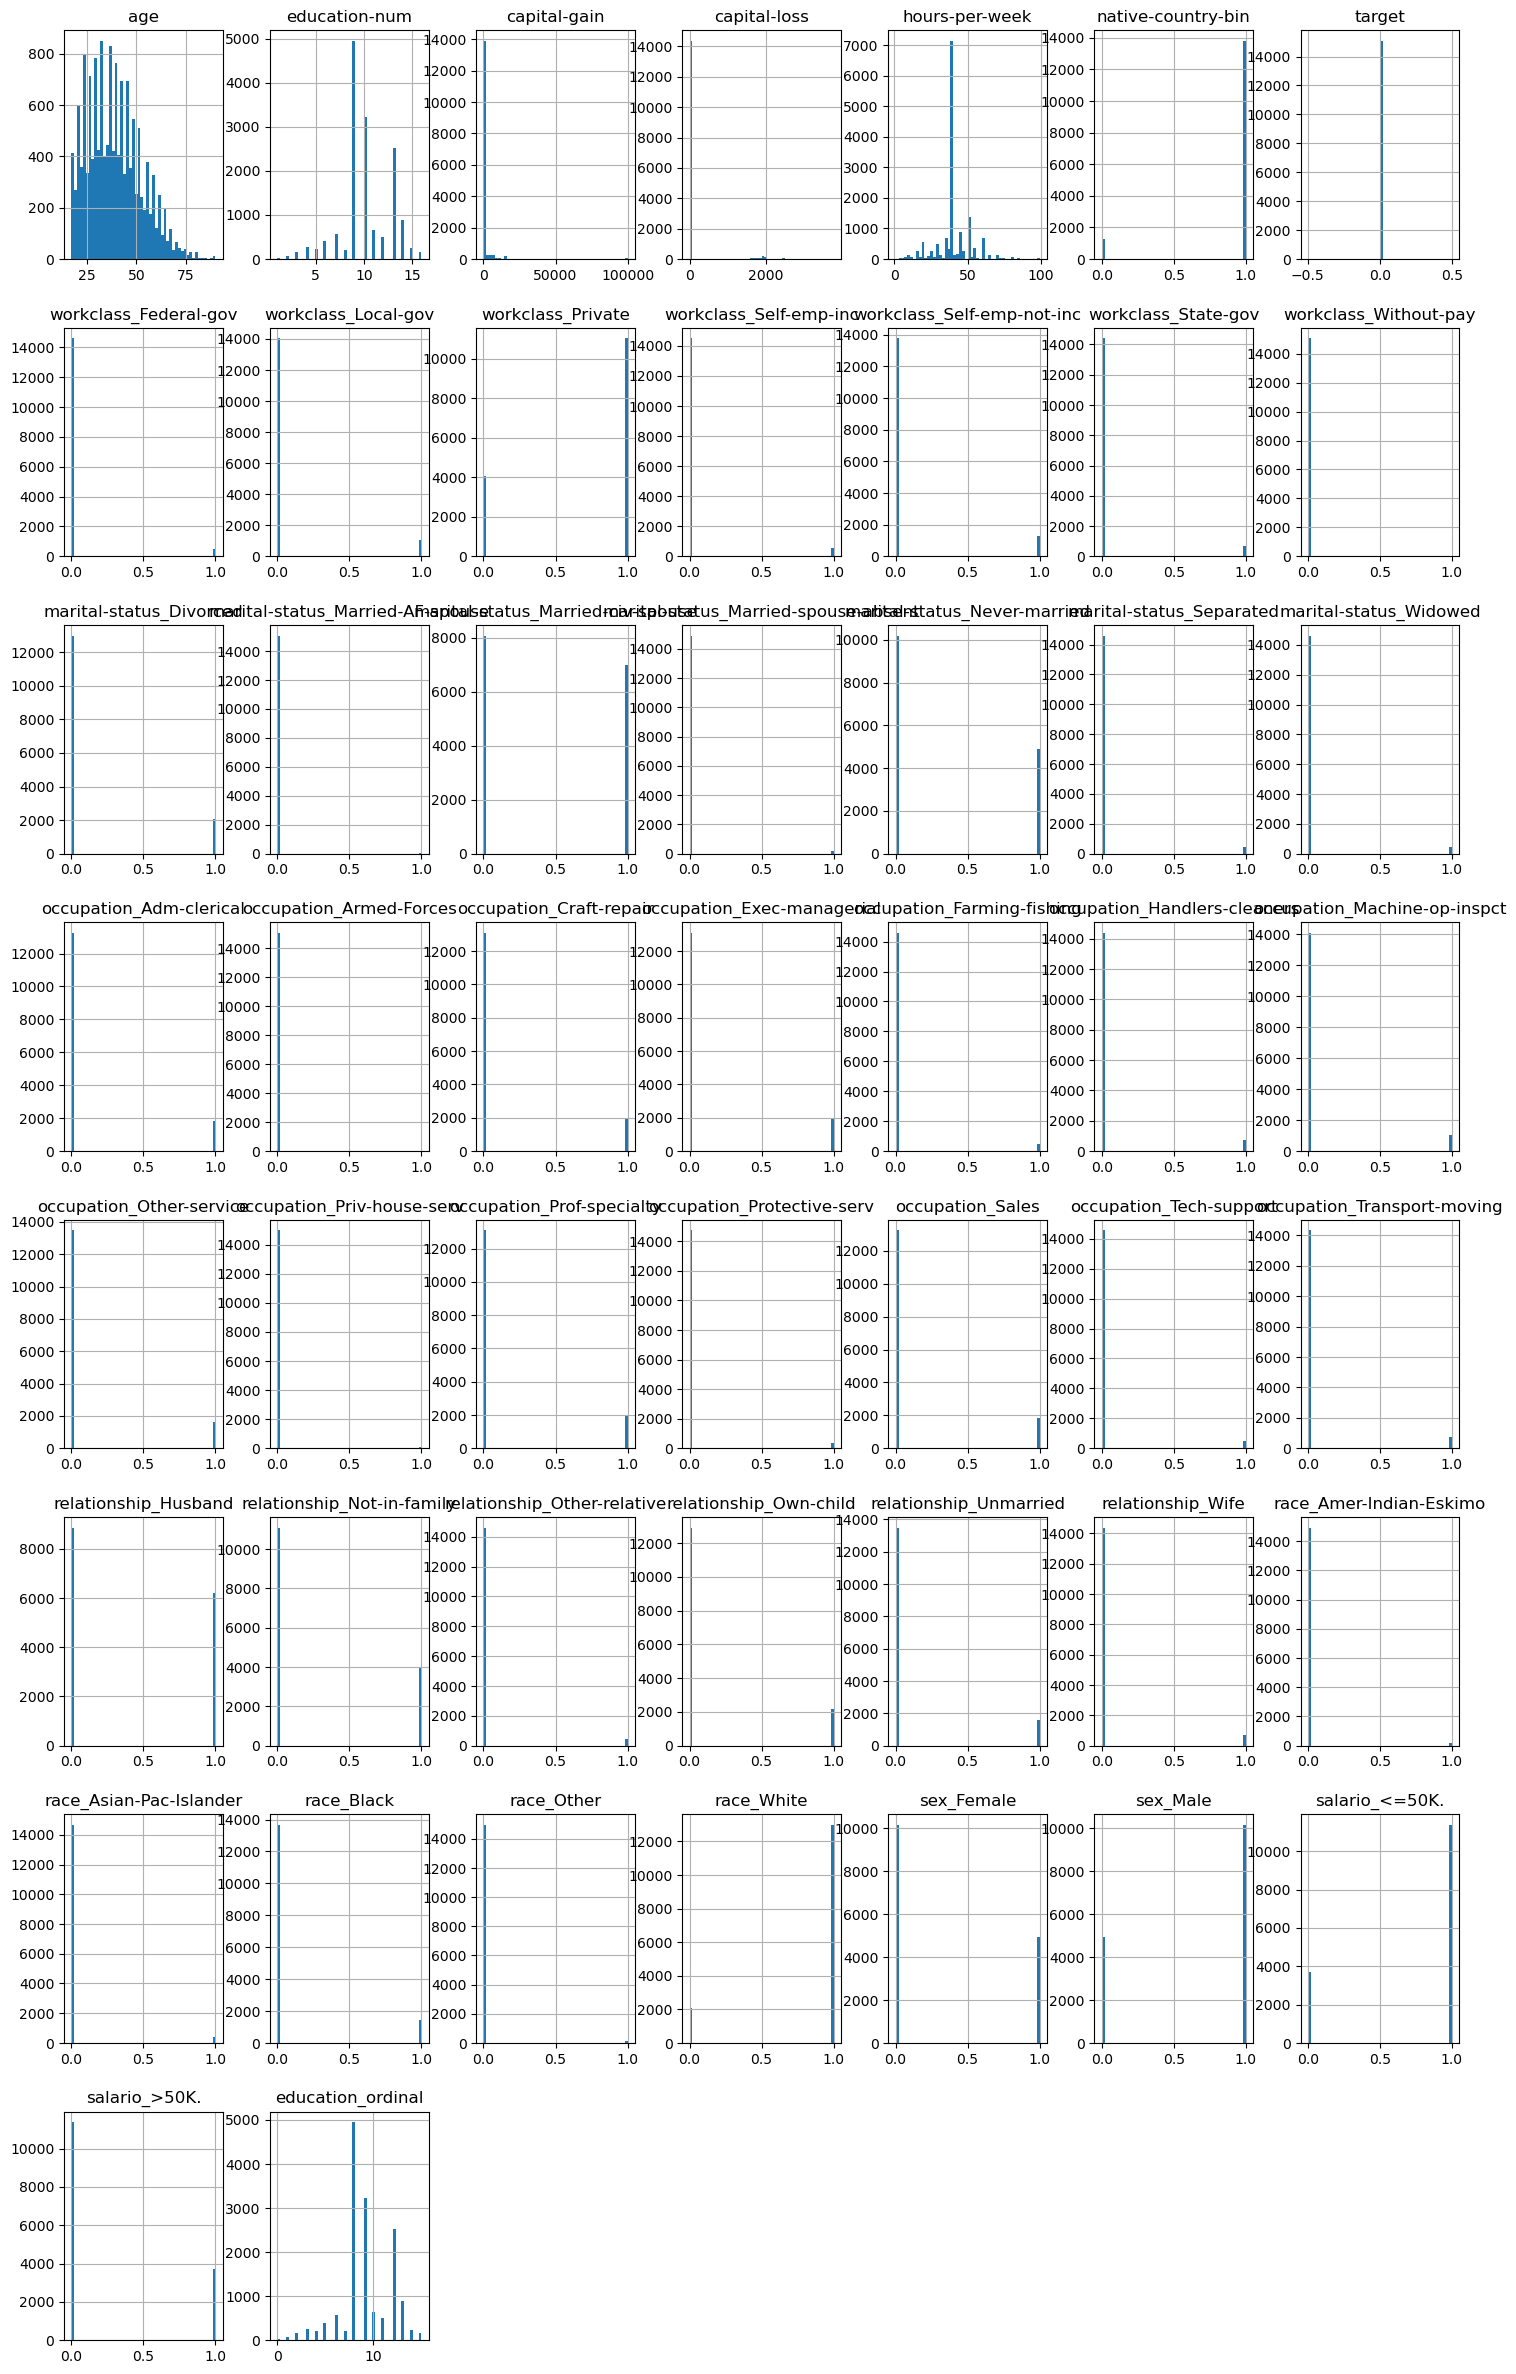

In [76]:
test_set.hist(bins=50, figsize=(18, 30)) 
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'education_ordinal'}>, <Axes: >]],
      dtype=object)

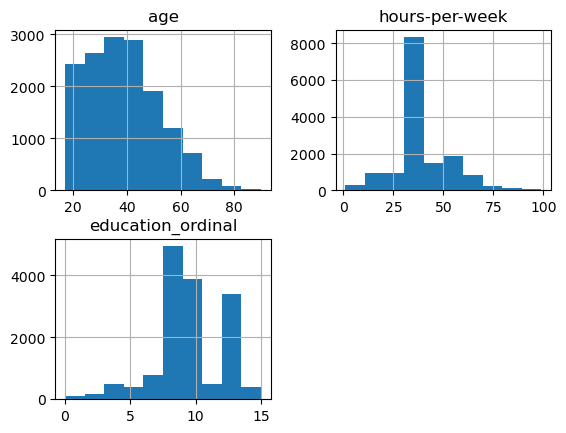

In [77]:
test_set[['age','hours-per-week','education_ordinal']].hist()

In [78]:
features_num = ['age','hours-per-week','education_ordinal']

min_max_scaler = MinMaxScaler(feature_range = (0,1))

resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(test_set[features_num]), columns= features_num)

resultado_min_max.describe()

,age,hours-per-week,education_ordinal
count,15060.000000,15060.000000,15060.000000
mean,0.298196,0.407669,0.607517
std,0.183297,0.123090,0.170582
min,0.000000,0.000000,0.000000
25%,0.150685,0.397959,0.533333
50%,0.273973,0.397959,0.600000
75%,0.424658,0.448980,0.800000
max,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'education_ordinal'}>, <Axes: >]],
      dtype=object)

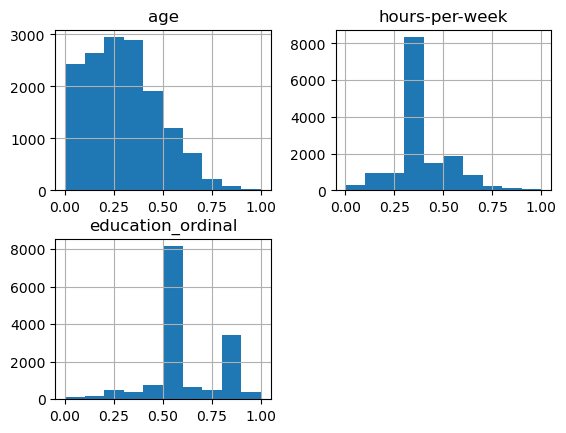

In [79]:
resultado_min_max.hist()

In [80]:
test_set[features_num] = min_max_scaler.fit_transform(test_set[features_num])

In [81]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   15060 non-null  float64
 1   education                             15060 non-null  object 
 2   education-num                         15060 non-null  int64  
 3   capital-gain                          15060 non-null  int64  
 4   capital-loss                          15060 non-null  int64  
 5   hours-per-week                        15060 non-null  float64
 6   native-country                        15060 non-null  object 
 7   native-country-bin                    15060 non-null  int64  
 8   target                                15060 non-null  int64  
 9   workclass_Federal-gov                 15060 non-null  int32  
 10  workclass_Local-gov                   15060 non-null  int32  
 11  workclass_Private   

### Ejercicio 7: Modelo (I)_test

Instancia el modelo de regresión logística, con el hiperparámetro "max_iter" a 10000.

### Ejercicio 8: Entrenamiento_test

Entrena modelo para el dataset de train tal como lo hemos preparado, creando antes el dataset sólo de features (X_train) y la serie con los valores del target (y_train). NOTA: Deshazte de "education_num" si has codificado tú a mano "education".

In [83]:
test_set.columns

Index(['age', 'education', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'native-country-bin', 'target',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupatio

In [84]:
lista_features_eliminar = ['education','education-num', 'capital-gain', 'capital-loss','native-country','target','salario_<=50K.','salario_>50K.']   

In [85]:
X_test = test_set.drop(lista_features_eliminar,axis = 1)
y_test = test_set['target']

HASTA AQUI_test

### Ejercicio 10: Evaluación (II)

Obten la predicción para X_train y para X_test.

In [89]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)
print(pred_train)
print()
print(pred_test)



[0 1 0 ... 0 0 1]

[0 0 0 ... 1 0 1]


### Ejercicio 11: Evaluación (III)

Muestra la matriz de confusión para los resultados de train, así como el clasification_report de sklearn

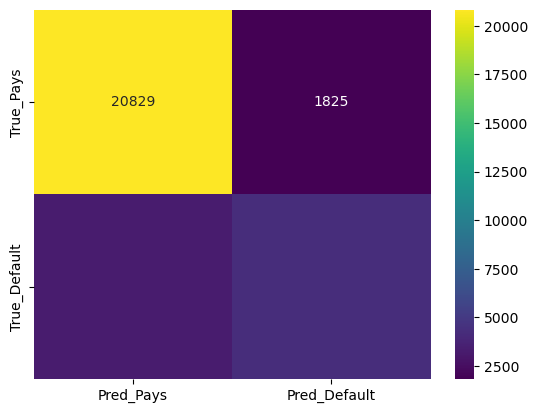

In [98]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_train,pred_train)

c_matrix_df = pd.DataFrame(c_matrix, columns=['Pred_Pays', 'Pred_Default'],
                           index= ['True_Pays', 'True_Default'])

sns.heatmap(c_matrix_df, annot=True, fmt='g', cmap='viridis');

c:\Users\Alfonso\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


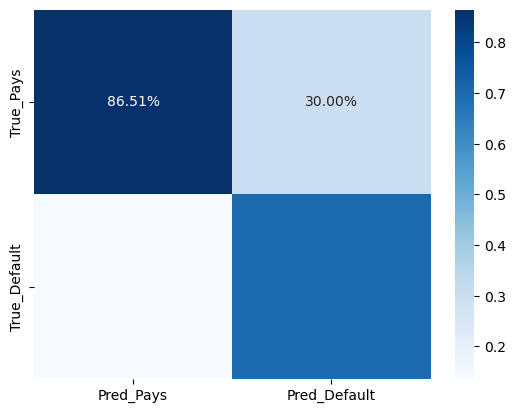

In [91]:
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues');

In [93]:
from sklearn.metrics import classification_report
from pprint import pprint

print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22654
           1       0.70      0.57      0.63      7508

    accuracy                           0.83     30162
   macro avg       0.78      0.74      0.76     30162
weighted avg       0.82      0.83      0.83     30162



### Ejercicio 12: Evaluación (IV)
Muestra la matriz de confusión y el classification report para los resultados del test. Comparála con los de train.

<Axes: >

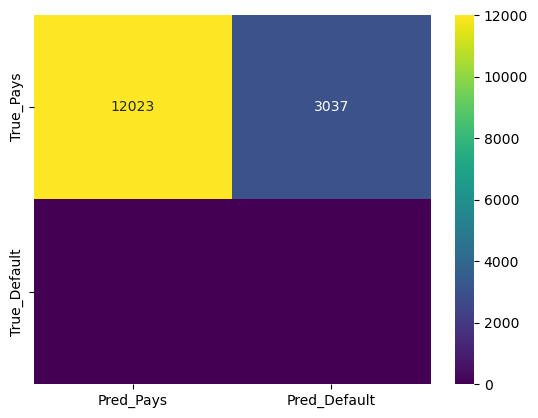

In [101]:
c_matrix_test = confusion_matrix(y_test,pred_test)

c_matrix_test_df = pd.DataFrame(c_matrix_test, columns = ['Pred_Pays', 'Pred_Default'] ,
                                index=['True_Pays', 'True_Default'])

sns.heatmap(c_matrix_test_df, annot=True, fmt='g', cmap='viridis')

c:\Users\Alfonso\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<Axes: >

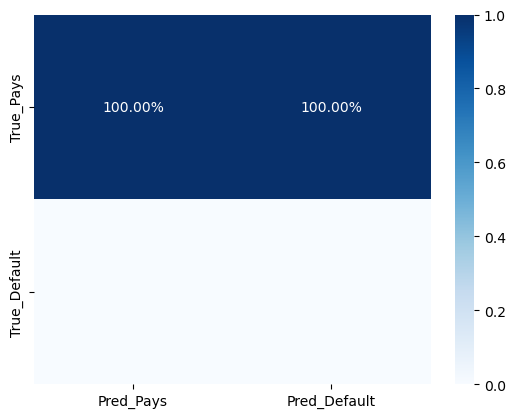

In [104]:
sns.heatmap(c_matrix_test_df/np.sum(c_matrix_test_df), annot=True, fmt='.2%',cmap='Blues' )

In [105]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     15060
           1       0.00      0.00      0.00         0

    accuracy                           0.80     15060
   macro avg       0.50      0.40      0.44     15060
weighted avg       1.00      0.80      0.89     15060



c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Extra: 

1. Muestra la curva ROC de test.

2. Muestra los coeficientes y su importancia.

AUROC: nan


c:\Users\Alfonso\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


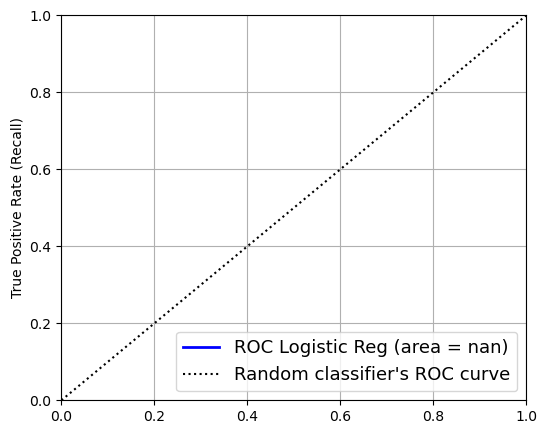

In [106]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
# fpr: false positive rate (eje x)
# tpr: true positive rate (eje y)
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)